# Experiment 2: Ohmic Resistor



In [2]:
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

time, highGain, analog_7, analog_8 = np.loadtxt('nonohmic.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3), unpack = True)
time1, highGain1, analog7_1 = np.loadtxt('ohmic.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)

First thing we would like to do is to find the time points where the voltage changes, which indicates when we changed the voltage. This is so that we can compute the average voltage measured over time, which we will then use for our analysis. The best way to do this that I've found so far is to read through the .csv file and record down the x-values where the voltage appears to spike. We can plot them as well to see whether we're correct:

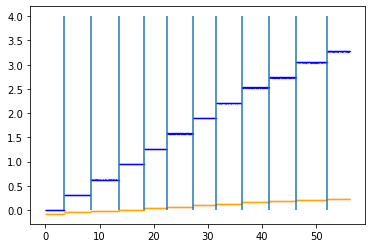

In [3]:
plt.scatter(time1, highGain1, s = 0.01, c = "orange")
plt.scatter(time1, analog7_1, s = 0.01, c = "blue")

vert_lines1 = np.array([3.52, 8.35, 13.60, 18.29, 22.43, 27.30, 31.55, 36.25, 41.34, 46.29, 52.06])
plt.vlines(vert_lines1, 0, 4)
plt.show()

In [4]:
#Performing the slicing

slice_01 = (time1 > 0) & (time1 < 3.52)
slice_02 = (time1 > 8.35) & (time1 < 13.60)
slice_03 = (time1 > 13.60) & (time1 < 18.29)
slice_04 = (time1 > 22.43) & (time1 < 27.30)
slice_05 = (time1 > 27.30) & (time1 < 31.55)
slice_06 = (time1 > 31.55) & (time1 < 36.25)
slice_07 = (time1 > 36.25) & (time1 < 41.34)
slice_08 = (time1 > 41.34) & (time1 < 46.29)
slice_09 = (time1 > 46.29) & (time1 < 52.06)

a7_slice_01, hg_slice_01 = analog7_1[slice_01], highGain1[slice_01]
a7_slice_02, hg_slice_02 = analog7_1[slice_02], highGain1[slice_02]
a7_slice_03, hg_slice_03 = analog7_1[slice_03], highGain1[slice_03]
a7_slice_04, hg_slice_04 = analog7_1[slice_04], highGain1[slice_04]
a7_slice_05, hg_slice_05 = analog7_1[slice_05], highGain1[slice_05]
a7_slice_06, hg_slice_06 = analog7_1[slice_06], highGain1[slice_06]
a7_slice_07, hg_slice_07 = analog7_1[slice_07], highGain1[slice_07]
a7_slice_08, hg_slice_08 = analog7_1[slice_08], highGain1[slice_08]
a7_slice_09, hg_slice_09 = analog7_1[slice_09], highGain1[slice_09]

a7_1 = []
hg_1 = []
erra7_1 = []
errhg_1 = []
for i in range(9):
    a7_1.append(np.mean(vars()["a7_slice_0" + str(i+1)]))
    hg_1.append(np.mean(vars()["hg_slice_0" + str(i+1)]))
    erra7_1.append(np.std(vars()["a7_slice_0" + str(i+1)]))
    errhg_1.append(np.std(vars()["hg_slice_0" + str(i+1)]))
    

Note that the high gain measurements measures the voltage across the $1 \Omega$ resistor, and the analog 7 (A7) measures the total voltage drop across both resistors. So to find the voltage drop across the $10\text{k} \Omega$ resistor, we have to take the analog 7 input and subtract off the high gain measurement. The high gain is also useful here to measure the current. Since $V = IR$ is the theoretical relationship and our resistor conveniently has a resistance of 1, then the voltage reading that we get also happens to be the current through the entire system.

Essentially, this means that if we plot high gain against the voltage we should expect to see a linear relationship.

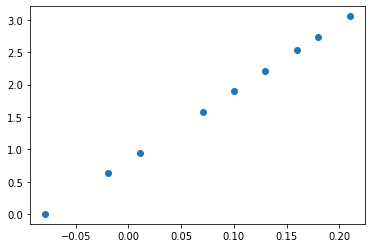

In [5]:

plt.scatter(hg_1, a7_1)
plt.show()

From this we can see visually that the plot appears to be linear. To verify this, we can perform a linear regression. We expect our plot to obey the form $y = mx$, so that's the regression model we use. However, we will introduce this y-intercept $b$, which will essentially represent the systematic offset from the high gain not being zeroed.


In [6]:
def linear(m, x, b):
    return m*x + b

opt1, cov1= opt.curve_fit(linear, hg_1, a7_1)
slope1, y_int1 = opt1
dslope1, dy_int1 = np.sqrt(np.diag(cov1))

print(f"Slope: {slope1} \u00b1 {dslope1}")
print(f"y-intercept: {y_int1} \u00b1 {dy_int1}")

Slope: 10.590562662874095 ± 0.0050057712950719695
y-intercept: 0.8358430394626908 ± 0.0006252615245745789


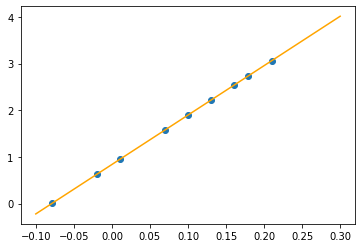

In [7]:
x_values = np.linspace(-0.1, 0.3, 20)
y_values = slope1*x_values + y_int1

plt.scatter(hg_1, a7_1)
plt.plot(x_values, y_values, c = 'orange')
plt.show()

The very strong agreement with the linear plot confirms Ohm's law: $V = IR$. Furthermore, since the x-axis is also representative of current, the slope of the line represents the resistance of the $10k\Omega$ resistor. This is also exactly what we see, since the slope is $9.59 \pm 0.005$.

# Experiment 2: Non Ohmic Resistor

One thing I would like to point out here (and I also elaborate more on in the actual lab report), but since the first data set was simply used to figure out which voltage ranges we should be using, I did not do any analysis on that dataset. <!-- maybe change this -->

Just like last time, we first have to import the data, which we do here:

First we need to figure out the time intervals in which we changed the voltage. Just like with the ohmic resistor, we plot the voltage against time, and plot vertical lines.

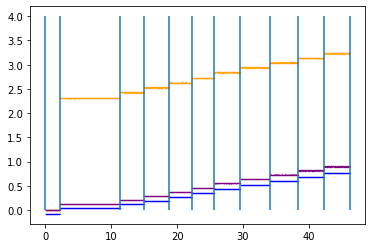

In [8]:
plt.scatter(time, highGain, c = 'blue', s = 0.01)
plt.scatter(time, analog_7, c = 'orange', s = 0.01)
plt.scatter(time, analog_8, c = 'purple', s = 0.01)

vert_lines2 = np.array([0, 2.18, 11.37, 15.01, 18.79, 22.22, 25.67, 29.63, 34.04, 38.38, 42.31, 46.22])
plt.vlines(vert_lines2, 0, 4)
plt.show()

In [9]:
slice_1 = (time > 2.18) & (time < 11.37)
slice_2 = (time > 11.37) & (time < 15.01)
slice_3 = (time > 15.01) & (time < 18.79)
slice_4 = (time > 18.79) & (time < 22.22)
slice_5 = (time > 22.22) & (time < 25.67)
slice_6 = (time > 25.67) & (time < 29.63)
slice_7 = (time > 29.63) & (time < 34.04)
slice_8 = (time > 34.04) & (time < 38.38)
slice_9 = (time > 38.38) & (time < 42.31)
slice_10 = (time > 42.31) & (time < 46.22)


a7_slice1, a8_slice1, hg_slice1 = analog_7[slice_1], analog_8[slice_1], highGain[slice_1]
a7_slice2, a8_slice2, hg_slice2 = analog_7[slice_2], analog_8[slice_2], highGain[slice_2]
a7_slice3, a8_slice3, hg_slice3 = analog_7[slice_3], analog_8[slice_3], highGain[slice_3]
a7_slice4, a8_slice4, hg_slice4 = analog_7[slice_4], analog_8[slice_4], highGain[slice_4]
a7_slice5, a8_slice5, hg_slice5 = analog_7[slice_5], analog_8[slice_5], highGain[slice_5]
a7_slice6, a8_slice6, hg_slice6 = analog_7[slice_6], analog_8[slice_6], highGain[slice_6]
a7_slice7, a8_slice7, hg_slice7 = analog_7[slice_7], analog_8[slice_7], highGain[slice_7]
a7_slice8, a8_slice8, hg_slice8 = analog_7[slice_8], analog_8[slice_8], highGain[slice_8]
a7_slice9, a8_slice9, hg_slice9 = analog_7[slice_9], analog_8[slice_9], highGain[slice_9]
a7_slice10, a8_slice10, hg_slice10 = analog_7[slice_10], analog_8[slice_10], highGain[slice_10]

a7 = []
a8 = []
hg = []
erra7 = []
erra8 = []
errhg = []
for i in range(10):
    a7.append(np.mean(vars()["a7_slice" + str(i+1)]))
    a8.append(np.mean(vars()["a8_slice" + str(i+1)]))
    hg.append(np.mean(vars()["hg_slice" + str(i+1)]))
    erra7.append(np.std(vars()["a7_slice" + str(i+1)]))
    erra8.append(np.std(vars()["a8_slice" + str(i+1)]))
    errhg.append(np.std(vars()["hg_slice" + str(i+1)]))


It's hard to see from the scatter plot, so I used `plt.plot` instead. From here, we can see that the plot is almost linear. This is expected, since we selected our minimum voltage such that it would casue the LED to illuminate, and when this threshold is met the diode essentially behaves like a resistor, except that the voltage drop across it is always constant. As a result, we expect a linear plot, and this is verified nicely by our data. 

In [10]:
opt2, cov2 = opt.curve_fit(linear, hg, a7)
slope2, y_int2 = opt2
dslope2, dy_int2 = np.sqrt(np.diag(cov2))

print(f"Slope: {slope2} \u00b1 {dslope2}")
print(f"y-intercept: {y_int2} \u00b1 {dy_int2}")

Slope: 1.2500941218879296 ± 0.010389985111086405
y-intercept: 2.280550406123433 ± 0.0048370178929341605


This makes sense!